In [462]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense , Dropout  # type: ignore
from keras.optimizers import Adamax    # type: ignore
import tensorflow as tf
import numpy as np # type: ignore
import pandas as pd # type: ignore
from tensorflow.keras.losses import MeanSquaredError # type: ignore
import seaborn as sns
import matplotlib.pyplot as plt


In [463]:
train_data = pd.read_csv('cleaned_train_data.csv') # Loading the  cleaned data from the  main model (XGBoost)
test_data = pd.read_csv('cleaned_test_data.csv')

In [464]:
test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [465]:
X_train = train_data.drop('SalePrice',axis=1)
y_train = train_data['SalePrice']

In [466]:
X_train.shape

(1460, 193)

In [467]:
y_train.shape

(1460,)

<Axes: >

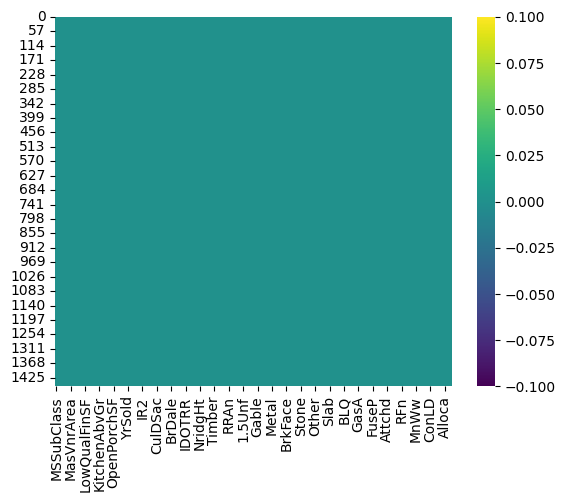

In [468]:
sns.heatmap(X_train.isnull(),cbar=True,cmap='viridis') 

In [469]:
model = Sequential(
          [
              Dense(50,activation='relu',input_shape=(X_train.shape[1],)),
              Dropout(0.25),
              Dense(25,activation='relu'),
              Dense(1,activation='linear'),
          ]          
)

c:\Users\DELL\Desktop\ML\House Price XGBoost\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [470]:
model.compile(optimizer=Adamax(learning_rate=0.001),loss=MeanSquaredError(),metrics=['mae'])

model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_130 (Dense)               │ (None, 50)             │         9,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,001 (42.97 KB)

 Trainable params: 11,001 (42.97 KB)

 Non-trainable params: 0 (0.00 B)

In [471]:
history = model.fit(X_train ,y_train,epochs=200 , validation_split=0.2 )

Epoch 1/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 38614712320.0000 - mae: 180263.4688 - val_loss: 39041048576.0000 - val_mae: 179973.0625
Epoch 2/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 37814153216.0000 - mae: 177877.3438 - val_loss: 37909422080.0000 - val_mae: 176968.3438
Epoch 3/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 38512578560.0000 - mae: 177221.4219 - val_loss: 36271960064.0000 - val_mae: 172529.1250
Epoch 4/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 32691552256.0000 - mae: 165148.7812 - val_loss: 33532055552.0000 - val_mae: 164833.5000
Epoch 5/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 32869208064.0000 - mae: 162642.6406 - val_loss: 29589803008.0000 - val_mae: 153062.0000
Epoch 6/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28952184832.0000 - mae: 152771.2500 - val_loss: 24342108160.0000 - val_mae: 135891.0625
Epoch 7/200
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23477889024.0000 - mae: 131259.8594 - val_loss: 183646515

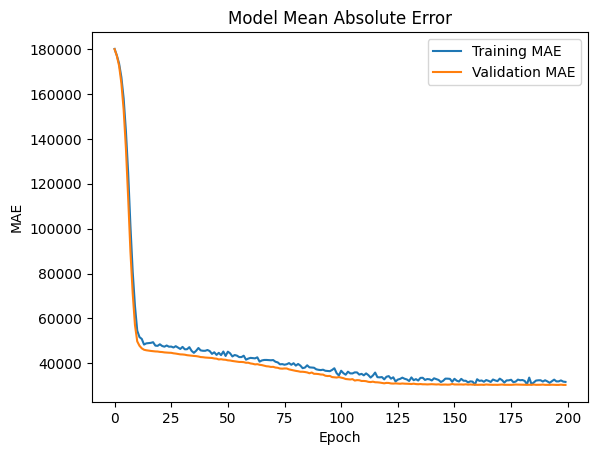

In [472]:


plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [473]:
y_pred = model.predict(test_data)
y_pred = y_pred.flatten()


submission = pd.DataFrame({
    "Id": range(1461, 1461 + len(y_pred)),
        "SalePrice": y_pred
    })

print( submission['Id'][0] , y_pred[0] )
submission.to_csv('submission_NN.csv', index=False)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
1461 142172.23


In [474]:
from sklearn.metrics import mean_absolute_error
y_test = pd.read_csv('sample_submission.csv')['SalePrice']
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 46315.90209811222
